# General Linear Models

https://github.com/mikexcohen/LinAlg4DataScience/blob/main/LA4DS_ch11.ipynb

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# null space
from scipy.linalg import null_space

import sympy as sym


[23.13033815  3.69820606]


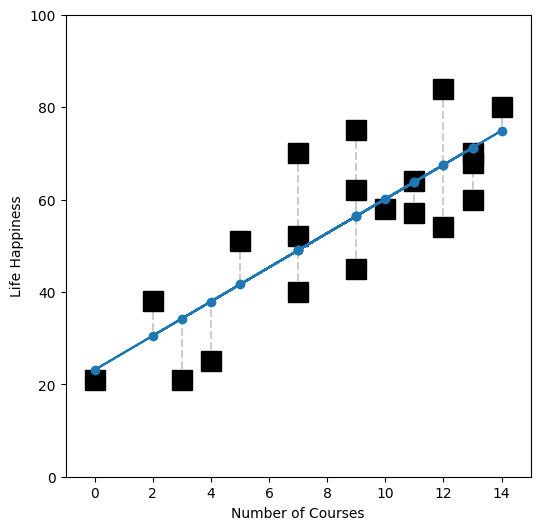

In [ ]:
# Fake data
numcourses = [13,4,12,3,14,13,12,9,11,7,13,11,9,2,5,7,10,0,9,7]
happiness  = [70,25,54,21,80,68,84,62,57,40,60,64,45,38,51,52,58,21,75,70]

X = np.hstack((np.ones((20,1)), np.array(numcourses, ndmin=2).T))  
X_leftinv = np.linalg.inv(X.T @ X) @ X.T
beta = X_leftinv @ happiness

print(beta)

# Predict
Y_pred = X@beta

plt.figure(figsize=(6,6))
plt.plot(numcourses,happiness,'ks',markersize=15)
plt.plot(numcourses, Y_pred,'o-')

for n,y,yHat in zip(numcourses,happiness,Y_pred):
  plt.plot([n,n],[y,yHat],'--',color=[.8,.8,.8],zorder=-10)

plt.xlabel("Number of Courses")
plt.ylabel("Life Happiness")
plt.xlim([-1,15])
plt.ylim([0,100])
plt.show()

# Lease Squares Applications

https://github.com/mikexcohen/LinAlg4DataScience/blob/main/LA4DS_ch12.ipynb

In [3]:

import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

### Korean bike rental regression

In [4]:
# Data citation: Sathishkumar V E, Jangwoo Park, and Yongyun Cho. 'Using data mining techniques for bike sharing demand 
#                prediction in metropolitan city.' Computer Communications, Vol.153, pp.353-366, March, 2020
# data source website: https://archive.ics.uci.edu/ml/datasets/Seoul+Bike+Sharing+Demand

# import the data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00560/SeoulBikeData.csv"
data = pd.read_csv(url,sep=',',encoding='unicode_escape')

# let's have a look
data

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


<Axes: xlabel='Date', ylabel='Rented Bike Count'>

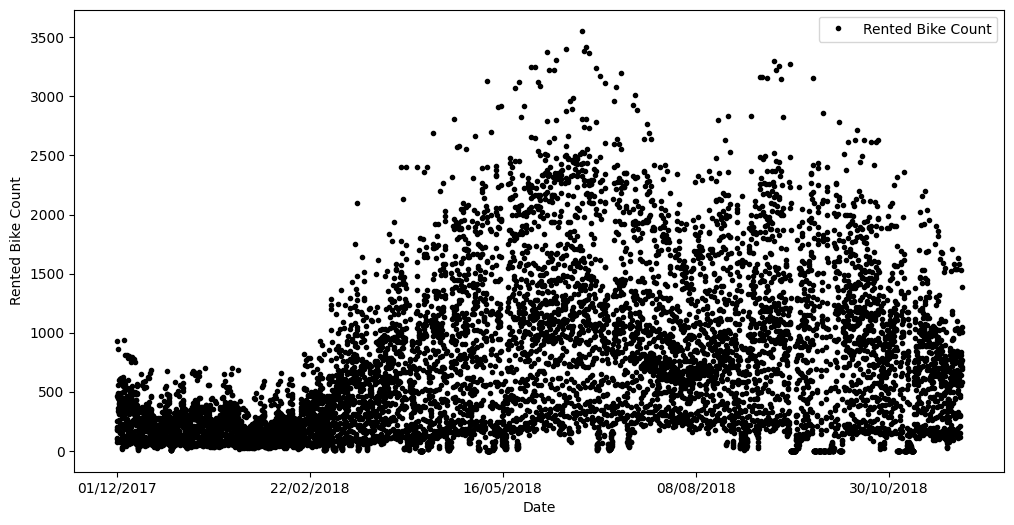

In [6]:
data.plot(x = "Date", 
          y = "Rented Bike Count", 
          color = 'k', 
          marker = '.', 
          linestyle = 'none', 
          figsize = (12,6),
          ylabel = "Rented Bike Count")

<Axes: xlabel='Date'>

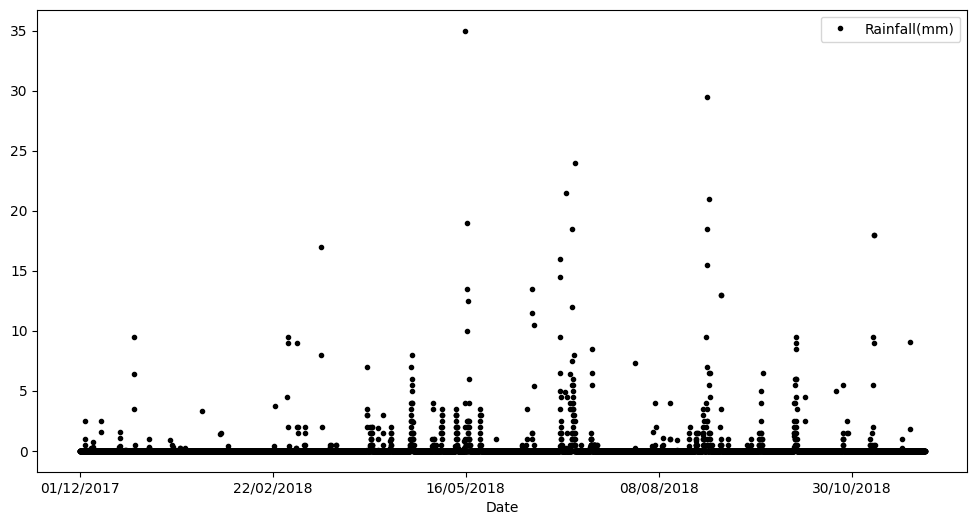

In [7]:
data.plot(x = "Date",
          y = "Rainfall(mm)",
          color = 'k',
          marker = '.',
          linestyle = 'none',
          figsize = (12,6),)

In [8]:
data.corr(method="pearson",
          numeric_only=True)

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
Rented Bike Count,1.000000,0.410257,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804
Hour,0.410257,1.000000,0.124114,-0.241644,0.285197,0.098753,0.003054,0.145131,0.008715,-0.021516
Temperature(°C),0.538558,0.124114,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405
Humidity(%),-0.199780,-0.241644,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183
Wind speed (m/s),0.121108,0.285197,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554
Visibility (10m),0.199280,0.098753,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695
Dew point temperature(°C),0.379788,0.003054,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887
Solar Radiation (MJ/m2),0.261837,0.145131,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301
Rainfall(mm),-0.123074,0.008715,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500
Snowfall (cm),-0.141804,-0.021516,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000


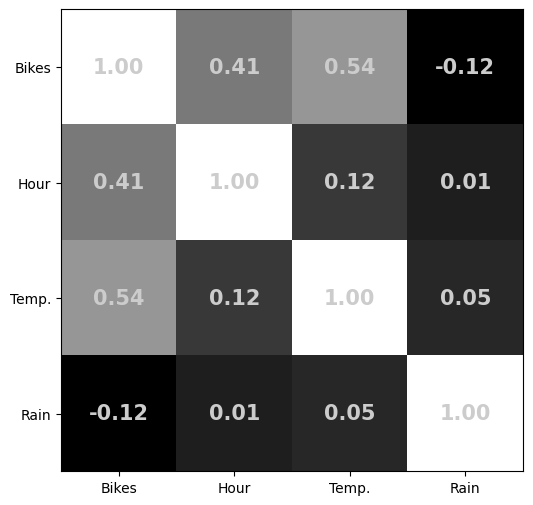

In [9]:
# Show matrix for select columns

columns2use = ['Rented Bike Count','Hour','Temperature(°C)','Rainfall(mm)']
colsshort = ['Bikes','Hour','Temp.','Rain'] # for axis labeleing

# re-compute the correlation matrix for select columns
R = data[columns2use].corr()

plt.figure(figsize=(6,6))
plt.imshow(R.values, cmap="gray")
plt.xticks(range(4),labels=colsshort)
plt.yticks(range(4),labels=colsshort)
for (j,i),num in np.ndenumerate(R.values):
    plt.text(i, j, f'{num:.2f}', color=[0.8,0.8,0.8],ha='center',va='center',fontweight='bold',fontsize=15)
plt.show()



In [10]:
# binarize the seasons
data.replace(['Spring','Summer', 'Autumn','Winter'],[1,1,0,0], inplace=True)
data

C:\Users\Paul.Carvalho\AppData\Local\Temp\ipykernel_13152\3456959338.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace(['Spring','Summer', 'Autumn','Winter'],[1,1,0,0], inplace=True)


,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,0,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,0,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,0,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,0,No Holiday,Yes


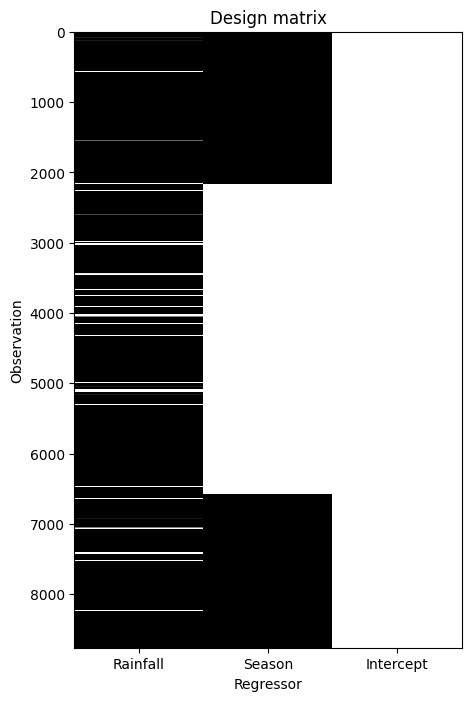

In [11]:
# Create a design matrix
desmat = data[['Rainfall(mm)','Seasons']].to_numpy()

# add an intercept
desmat = np.append(desmat,np.ones((desmat.shape[0],1)),axis=1)

# extract DV
y = data[['Rented Bike Count']].to_numpy()


# visualize the design matrix
plt.figure(figsize=(5,8))
plt.imshow(desmat, aspect='auto', vmin=0, vmax=1, interpolation="nearest", cmap='gray')
plt.ylabel('Observation')
plt.xlabel('Regressor')
plt.title('Design matrix')
plt.xticks(range(3),labels=['Rainfall','Season','Intercept'])
plt.show()

Text(0, 0.5, 'Bikes rented')

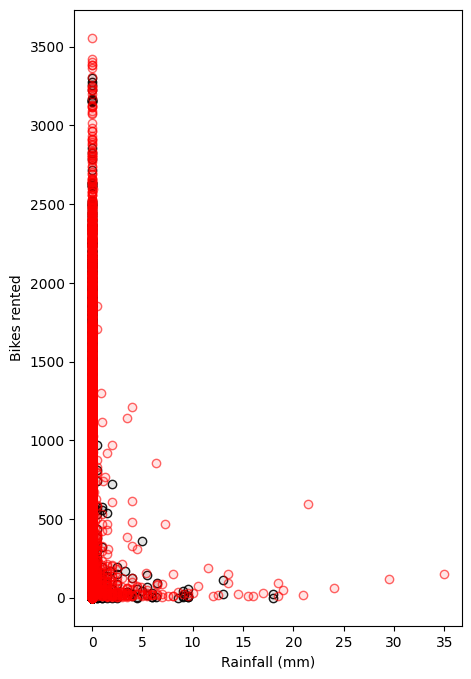

In [40]:
plt.figure(figsize=(5,8))
plt.plot(desmat[desmat[:,1]==0,0], y[desmat[:,1]==0],'o',markerfacecolor=(0,0,0,.1), markeredgecolor=(0,0,0,.9), label="Winter")
plt.plot(desmat[desmat[:,1]==1,0], y[desmat[:,1]==1],'o',markerfacecolor=(1,0,0,.1),markeredgecolor=(1,0,0,.6), label="Summer")
plt.xlabel("Rainfall (mm)")
plt.ylabel("Bikes rented")

In [12]:
# Fit model to the data using least squares
beta = np.linalg.lstsq(desmat,y,rcond=None)
beta

(array([[-80.52367456],
        [369.12668112],
        [530.49459615]]),
 array([3.29151286e+09]),
 np.int32(3),
 array([114.2084486 ,  99.04416813,  40.80408102]))

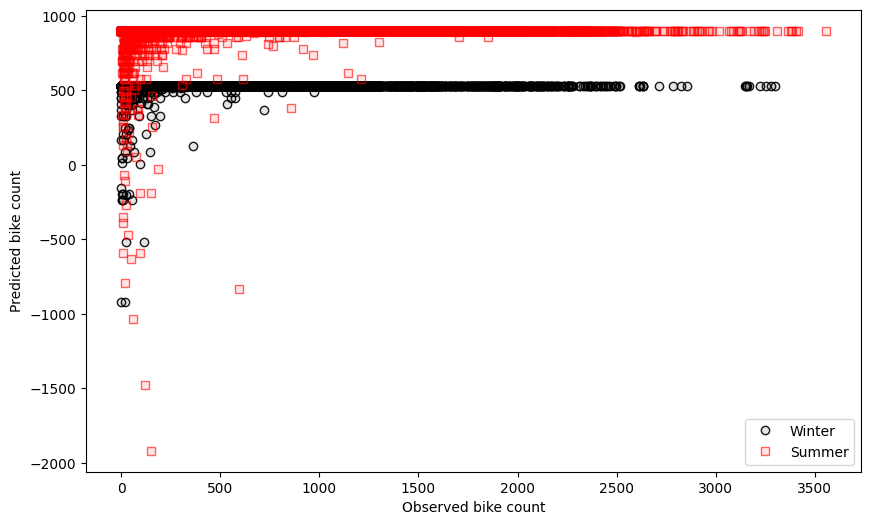

In [13]:
yHat = desmat@beta[0]

modelfit = np.corrcoef(y.T,yHat.T)[0,1]**2

plt.figure(figsize=(10,6))
plt.plot(y[desmat[:,1]==0],yHat[desmat[:,1]==0],'o',markerfacecolor=(0,0,0,.1),markeredgecolor=(0,0,0,.9),label='Winter')
plt.plot(y[desmat[:,1]==1],yHat[desmat[:,1]==1],'s',markerfacecolor=(1,0,0,.1),markeredgecolor=(1,0,0,.6),label='Summer')
plt.legend()
plt.xlabel("Observed bike count")
plt.ylabel("Predicted bike count")
plt.show()


In [14]:
import statsmodels.api as sm

# Extract data as pandas dataframe
desmat_df = data[["Rainfall(mm)","Seasons"]]
obsdata_df = data[["Rented Bike Count"]]

# Create and fit the model
desmat_df = sm.add_constant(desmat_df)
model = sm.OLS(obsdata_df,desmat_df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      Rented Bike Count   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     468.8
Date:                Wed, 10 Sep 2025   Prob (F-statistic):          3.80e-194
Time:                        16:31:34   Log-Likelihood:                -68654.
No. Observations:                8760   AIC:                         1.373e+05
Df Residuals:                    8757   BIC:                         1.373e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          530.4946      9.313     56.963   

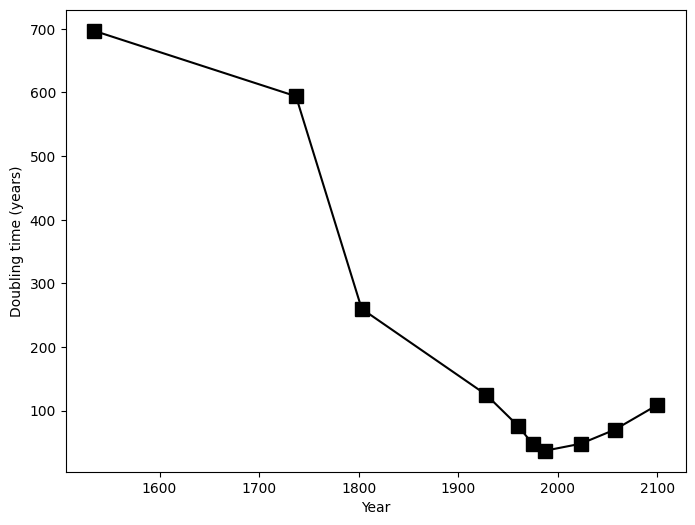

In [15]:
# the data
year       = [1534, 1737, 1803, 1928, 1960, 1975, 1987, 2023, 2057, 2100 ]
doubleTime = [ 697,  594,  260,  125,   76,   47,   37,   48,   70,  109 ]

N = len(year)


# plot it
plt.figure(figsize=(8,6))
plt.plot(year,doubleTime,'ks-',markersize=10)

plt.xlabel('Year')
plt.ylabel('Doubling time (years)')
plt.show()

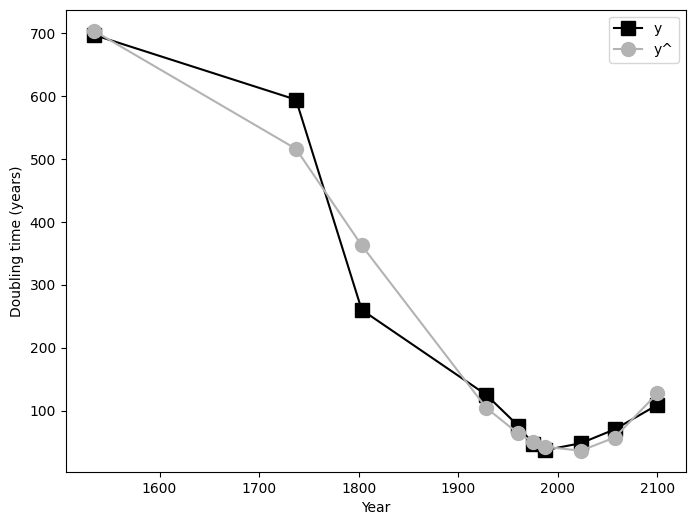

In [16]:
# Design matrix
X = np.zeros((N,4))

for i in range(4):
    X[:,i] = np.array(year) ** i

beta = np.linalg.lstsq(X,doubleTime,rcond=None)

yHat = X@beta[0]

# plot it
plt.figure(figsize=(8,6))
plt.plot(year,doubleTime,'ks-',markersize=10,label="y")
plt.plot(year,yHat,'o-',color=[0.7,0.7,0.7],markersize=10,label="y^")
plt.legend()
plt.xlabel('Year')
plt.ylabel('Doubling time (years)')
plt.show()

In [17]:
beta = np.polyfit(year,doubleTime,3)
yHat = np.polyval(beta,year)

C:\Users\Paul.Carvalho\AppData\Local\Temp\ipykernel_13152\3044548234.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ko" (-> color='k'). The keyword argument will take precedence.
  plt.plot(desmat_norain[desmat_norain[:,1]==0,0],


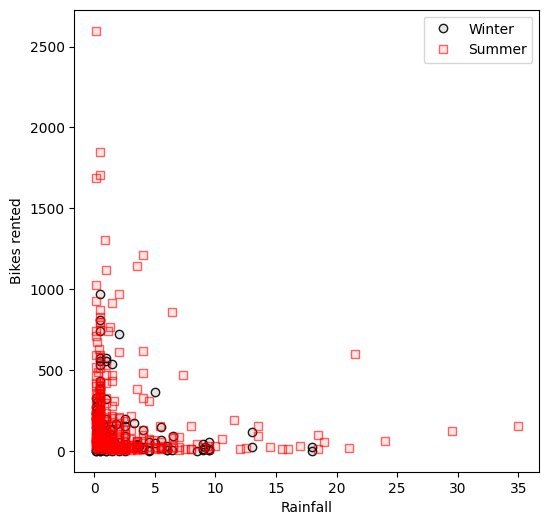

In [18]:
# Exercise 12-1
desmat = data[['Rainfall(mm)','Seasons']].to_numpy()
desmat = np.append(desmat,np.ones((desmat.shape[0],1)),axis=1)
y = data[['Rented Bike Count']].to_numpy()

desmat_norain = desmat[desmat[:,0]>0, :]
y_norain = y[desmat[:,0]>0,: ]

plt.figure(figsize=(6,6))
plt.plot(desmat_norain[desmat_norain[:,1]==0,0], 
         y_norain[desmat_norain[:,1]==0,0], 
         'ko', 
         color=[0.7,0.7,0.7], 
         markerfacecolor=(0,0,0,0.1), 
         markeredgecolor=(0,0,0,0.9),
         label="Winter")
plt.plot(desmat_norain[desmat_norain[:,1]==1,0], 
         y_norain[desmat_norain[:,1]==1,0], 
         's', 
         color=[0.7,0.7,0.7], 
         markerfacecolor=(1,0,0,0.1), 
         markeredgecolor=(1,0,0,0.6),
         label='Summer')
plt.legend()
plt.xlabel("Rainfall")
plt.ylabel("Bikes rented")
plt.show()

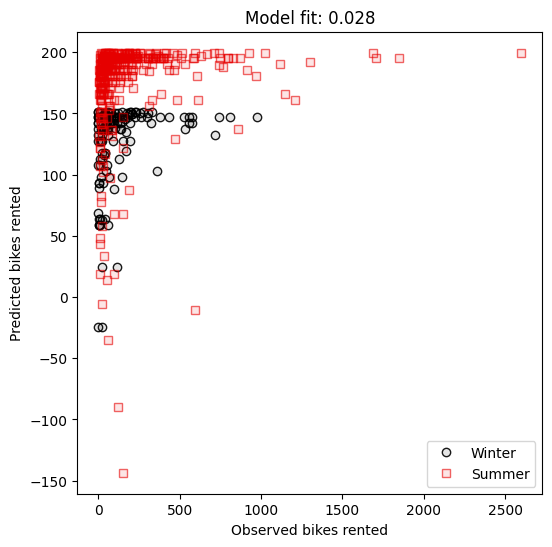

In [19]:
beta_norain = np.linalg.lstsq(desmat_norain,y_norain,rcond=None)

yHat_norain = desmat_norain@beta_norain[0]

modelfit = np.corrcoef(y_norain.T,yHat_norain.T,)[0,1]**2

plt.figure(figsize=(6,6))
plt.plot(y_norain[desmat_norain[:,1]==0, :], yHat_norain[desmat_norain[:,1]==0, :], 'o', markerfacecolor=(0,0,0,0.1), markeredgecolor=(0,0,0,0.9), label = "Winter")
plt.plot(y_norain[desmat_norain[:,1]==1, :], yHat_norain[desmat_norain[:,1]==1, :], 's', markerfacecolor=(0.9,0,0,0.1), markeredgecolor=(0.9,0,0,0.6), label = "Summer")
plt.legend()
plt.xlabel("Observed bikes rented")
plt.ylabel("Predicted bikes rented")
plt.title(f"Model fit: {modelfit:.3f}")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

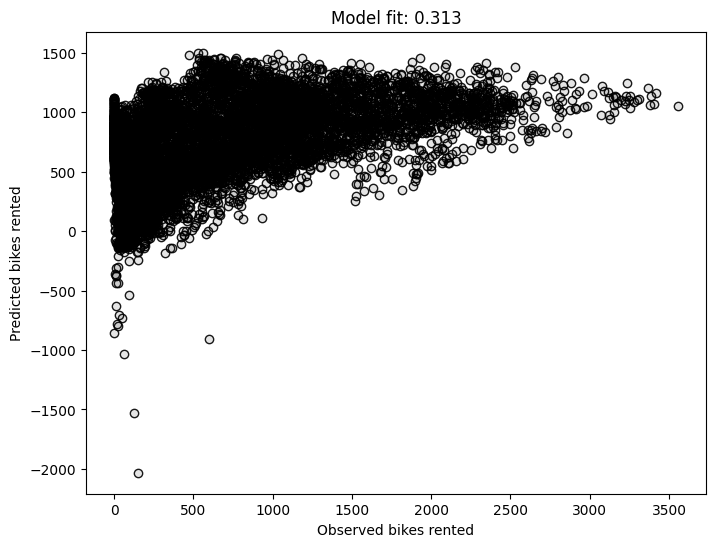

In [20]:
# Exercise 12-2
desmat = data[["Rainfall(mm)","Temperature(°C)"]].to_numpy()
desmat = np.append(desmat,np.ones((desmat.shape[0],1)),axis=1)

y = data["Rented Bike Count"].to_numpy()

beta = np.linalg.lstsq(desmat,y,rcond=None)

yHat = desmat@beta[0]

modelfit = np.corrcoef(y,yHat)[0,1]**2

plt.figure(figsize=(8,6))
plt.plot(y,yHat,'o',markerfacecolor=(0,0,0,0.1),markeredgecolor=(0,0,0,0.9))
plt.xlabel("Observed bikes rented")
plt.ylabel("Predicted bikes rented")
plt.title(f"Model fit: {modelfit:.3f}")
plt.show

In [21]:
# Exercise 12-3

desmat_lw = data[["Rainfall(mm)","Temperature(°C)"]].to_numpy()
lw = (2*desmat_lw[:,0] + .3*desmat_lw[:,1]).reshape(len(desmat_lw[:,0]),1)
desmat_lw = np.append(desmat_lw, np.ones((len(desmat_lw[:,0]),1)), axis=1)
desmat_lw = np.append(desmat_lw, lw, axis=1)

print(f"Matrix size: {desmat_lw.shape}")
print(f"Design matrix rank: {np.linalg.matrix_rank(desmat_lw)}")
np.corrcoef(desmat_lw.T)

pd.DataFrame(desmat_lw, columns=['Rain','Temp',"Int","Combo"]).corr()

Matrix size: (8760, 4)
Design matrix rank: 3


c:\Users\Paul.Carvalho\Documents\data science\python\Linear-Algebra\venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3065: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\Paul.Carvalho\Documents\data science\python\Linear-Algebra\venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3066: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


,Rain,Temp,Int,Combo
Rain,1.000000,0.050282,NaN,0.562769
Temp,0.050282,1.000000,NaN,0.853866
Int,NaN,NaN,NaN,NaN
Combo,0.562769,0.853866,NaN,1.000000


In [22]:
# Left inverse
X_leftinv = np.linalg.inv(desmat_lw.T@desmat_lw) @ desmat_lw.T

beta1 = X_leftinv @ y
yHat = desmat_lw@beta1

modelfit1 = np.corrcoef(y.T,yHat.T)[0,1]**2
print(modelfit1)

0.2077267497226484


In [23]:
# Numpy lstsq
beta2 = np.linalg.lstsq(desmat_lw,y,rcond=None)
yHat = desmat_lw@beta2[0]

modelfit2 = np.corrcoef(y,yHat)[0,1]**2
print(modelfit2)

0.3126481542486899


In [47]:
# using statmodels
import statsmodels.api as sm

obsdata_df = data[["Rented Bike Count"]]

desmat_lw_df = pd.DataFrame(desmat_lw)

desmat_lw_df = sm.add_constant(desmat_lw_df)
model = sm.OLS(obsdata_df, desmat_lw_df).fit()

beta3 = model.params.values
modelfit3 = model.rsquared
print(modelfit3)

0.3126481542486902


c:\Users\Paul.Carvalho\Documents\data science\python\Linear-Algebra\venv\Lib\site-packages\statsmodels\tsa\tsatools.py:162: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  x = pd.concat(x[::order], axis=1)


In [49]:
# Exercise 12-4

gamma = 0.01

gnorm = gamma*np.linalg.norm(desmat_lw,"fro")**2

left_inv = np.linalg.inv(desmat_lw.T@desmat_lw + gnorm*np.eye(desmat_lw.shape[1]))

print(f"Matrix size: {left_inv.shape}")
print(f"Matrix rank: {np.linalg.matrix_rank(left_inv)}")



Matrix size: (4, 4)
Matrix rank: 4


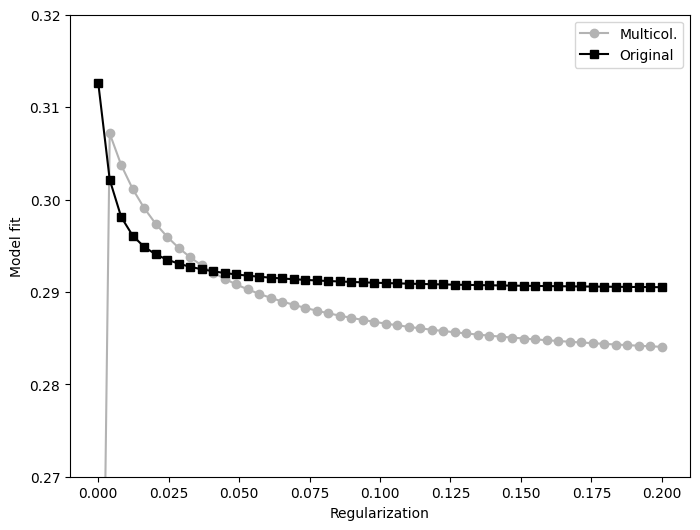

In [84]:
gamma = np.linspace(0,0.2)

out = np.zeros((len(gamma),2))

for i in range(len(gamma)):
    
    gnorm = gamma[i]*np.linalg.norm(desmat_lw, "fro")**2
    
    # Multicol
    left_inv = np.linalg.inv(desmat_lw.T@desmat_lw + gnorm*np.eye(desmat_lw.shape[1]))
    beta = left_inv@desmat_lw.T@y
    yHat = desmat_lw@beta

    # Original
    left_inv_orig = np.linalg.inv(desmat.T@desmat + gnorm*np.eye(desmat.shape[1]))
    beta_orig = left_inv_orig@desmat.T@y
    yHat_orig = desmat@beta_orig

    out[i,0] = np.corrcoef(y.T,yHat.T)[0,1]**2 
    out[i,1] = np.corrcoef(y.T,yHat_orig.T)[0,1]**2 


plt.figure(figsize=(8,6))
plt.plot(gamma,out[:,0],'o-',color=[0.7,0.7,0.7],label="Multicol.")
plt.plot(gamma,out[:,1],'s-',color=[0,0,0],label="Original")
plt.ylim((0.27,0.32))
plt.xlabel("Regularization")
plt.ylabel("Model fit")
plt.legend()
plt.show()

C:\Users\Paul.Carvalho\AppData\Local\Temp\ipykernel_13152\4155720077.py:13: RankWarning: Polyfit may be poorly conditioned
  beta = np.polyfit(year,doubleTime,i)


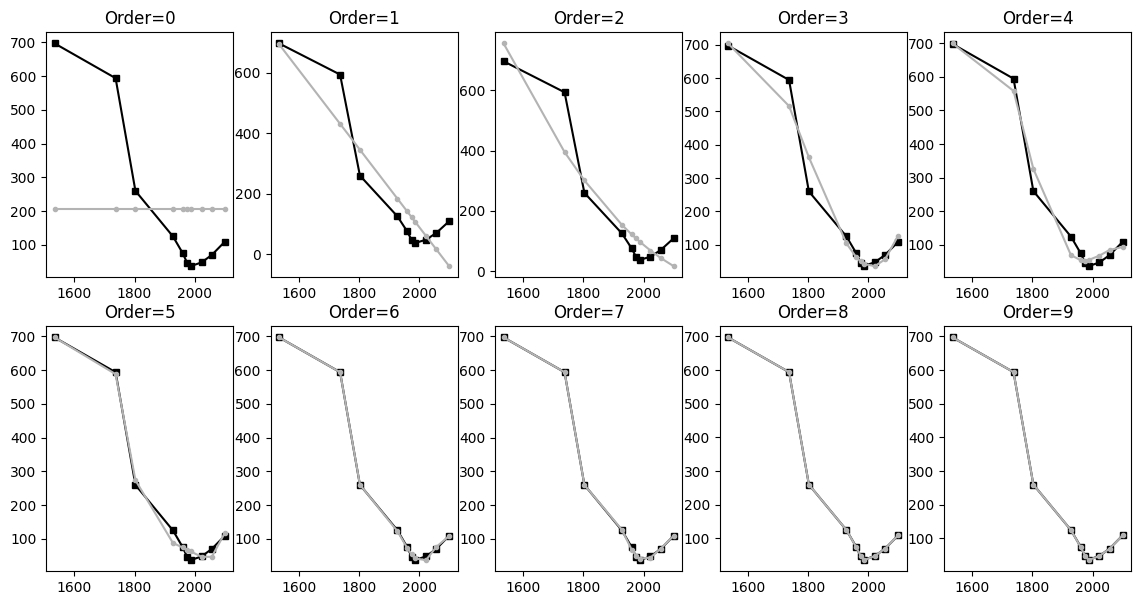

In [112]:
# Exercise 12-5

# the data
year       = [1534, 1737, 1803, 1928, 1960, 1975, 1987, 2023, 2057, 2100 ]
doubleTime = [ 697,  594,  260,  125,   76,   47,   37,   48,   70,  109 ]

N = len(year)

_,axs = plt.subplots(2,5,figsize=(14,7))
axs = axs.flatten()

for i in range(N):
    beta = np.polyfit(year,doubleTime,i)
    yHat = np.polyval(beta,year)

    # plot
    axs[i].plot(year, doubleTime, 'ks-', markersize=5)
    axs[i].plot(year, yHat, 'o-', color=[0.7,0.7,0.7], markersize=3)
    axs[i].set_title("Order=%g" %i)



# # Design matrix
# X = np.zeros((N,4))

# for i in range(4):
#     X[:,i] = np.array(year) ** i

# beta = np.linalg.lstsq(X,doubleTime,rcond=None)

# yHat = X@beta[0]


# # plot it
# plt.figure(figsize=(8,6))
# plt.plot(year,doubleTime,'ks-',markersize=10)

# plt.xlabel('Year')
# plt.ylabel('Doubling time (years)')
# plt.show()

In [ ]:
# Exercise 12-6
numcourses = [13,4,12,3,14,13,12,9,11,7,13,11,9,2,5,7,10,0,9,7]
happiness  = [70,25,54,21,80,68,84,62,57,40,60,64,45,38,51,52,58,21,75,70]

# design matrix
X = np.hstack((np.ones((20,1)),np.array(numcourses,ndmin=2).T))
beta = np.linalg.lstsq(X,happiness,rcond=None)[0]



[23.13033815  3.69820606]


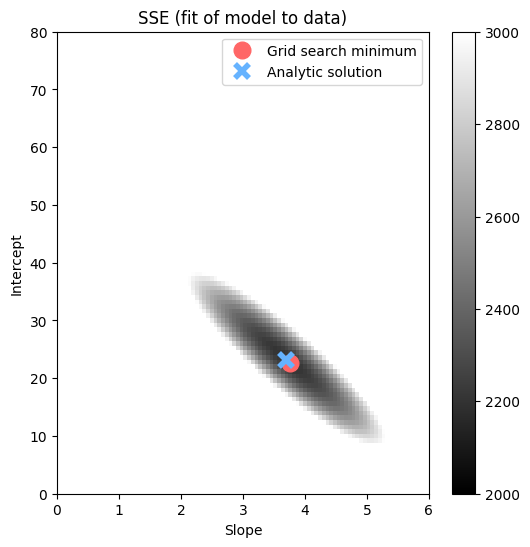

Analytic result: 
   Intercept: 23.13, slope: 3.70
 
Empirical result: 
   Intercept: 22.63, slope: 3.76


In [121]:
# the number of steps for each parameter
gridResolution = 100

# specify intercepts and slopes to test
intercepts = np.linspace(0,80,gridResolution)
slopes = np.linspace(0,6,gridResolution)

# initialize output matrix
SSEs = np.zeros((len(intercepts),len(slopes)))

# for-loops over parameters
for inti in range(len(intercepts)):
  for slopei in range(len(slopes)):

    # model-predicted data
    yHat = X @ np.array([intercepts[inti],slopes[slopei]]).T

    # sum of squared errors
    SSEs[inti,slopei] = np.sum((yHat-happiness)**2)


# find empirical minimum
i,j = np.unravel_index( np.argmin(SSEs),SSEs.shape )
empIntercept,empSlope = intercepts[i], slopes[j]


# plot the error landscape with empirical minimum
plt.figure(figsize=(6,6))
plt.imshow(SSEs,vmin=2000,vmax=3000,
           extent=[slopes[0],slopes[-1],intercepts[0],intercepts[-1]],
           origin='lower',aspect='auto',cmap='gray')
plt.plot(empSlope,empIntercept,'o',color=[1,.4,.4],markersize=12,label='Grid search minimum')
plt.plot(beta[1],beta[0],'x',color=[.4,.7,1],markeredgewidth=4,markersize=10,label='Analytic solution')
plt.colorbar()
plt.xlabel('Slope')
plt.ylabel('Intercept')
plt.title('SSE (fit of model to data)')
plt.legend()
plt.show()

# print out the results
print('Analytic result: ')
print(f'   Intercept: {beta[0]:.2f}, slope: {beta[1]:.2f}')
print(' ')
print('Empirical result: ')
print(f'   Intercept: {empIntercept:.2f}, slope: {empSlope:.2f}')

c:\Users\Paul.Carvalho\Documents\data science\python\Linear-Algebra\venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3065: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\Paul.Carvalho\Documents\data science\python\Linear-Algebra\venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3066: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


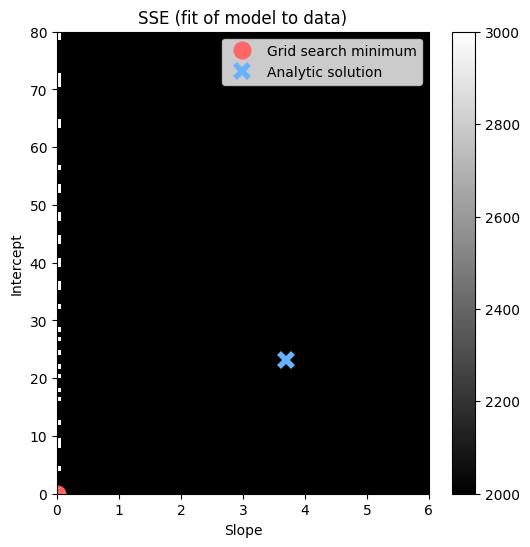

Analytic result: 
   Intercept: 23.13, slope: 3.70
 
Empirical result: 
   Intercept: 0.00, slope: 0.00


In [128]:
# the number of steps for each parameter
gridResolution = 100

# specify intercepts and slopes to test
intercepts = np.linspace(0,80,gridResolution)
slopes = np.linspace(0,6,gridResolution)

# initialize output matrix
r_sqr = np.zeros((len(intercepts),len(slopes)))
allYhat = np.zeros((len(intercepts),len(slopes),len(happiness)))

# for-loops over parameters
for inti in range(len(intercepts)):
  for slopei in range(len(slopes)):

    # model-predicted data
    yHat = X @ np.array([intercepts[inti],slopes[slopei]]).T

    # R2
    r_sqr[inti,slopei] = np.corrcoef(yHat,happiness)[0,1]**2

    allYhat[inti,slopei,:] = yHat


# find empirical minimum
i,j = np.unravel_index( np.argmin(r_sqr),r_sqr.shape )
empIntercept,empSlope = intercepts[i], slopes[j]


# plot the error landscape with empirical minimum
plt.figure(figsize=(6,6))
plt.imshow(r_sqr,vmin=2000,vmax=3000,
           extent=[slopes[0],slopes[-1],intercepts[0],intercepts[-1]],
           origin='lower',aspect='auto',cmap='gray')
plt.plot(empSlope,empIntercept,'o',color=[1,.4,.4],markersize=12,label='Grid search minimum')
plt.plot(beta[1],beta[0],'x',color=[.4,.7,1],markeredgewidth=4,markersize=10,label='Analytic solution')
plt.colorbar()
plt.xlabel('Slope')
plt.ylabel('Intercept')
plt.title('SSE (fit of model to data)')
plt.legend()
plt.show()

# print out the results
print('Analytic result: ')
print(f'   Intercept: {beta[0]:.2f}, slope: {beta[1]:.2f}')
print(' ')
print('Empirical result: ')
print(f'   Intercept: {empIntercept:.2f}, slope: {empSlope:.2f}')

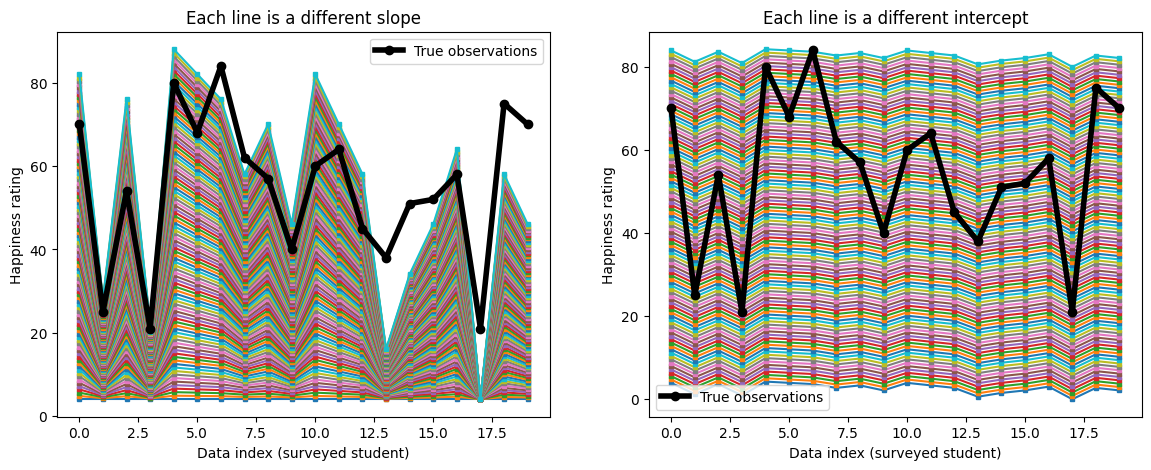

In [130]:
_,axs = plt.subplots(1,2,figsize=(14,5))

axs[0].plot(allYhat[5,:,:].T,'s-',markersize=3)
axs[0].plot(happiness,'ko-',linewidth=4,label='True observations')
axs[0].set_xlabel('Data index (surveyed student)')
axs[0].set_ylabel('Happiness rating')
axs[0].set_title('Each line is a different slope')
axs[0].legend()

axs[1].plot(allYhat[:,5,:].T,'s-',markersize=3)
axs[1].plot(happiness,'ko-',linewidth=4,label='True observations')
axs[1].set_xlabel('Data index (surveyed student)')
axs[1].set_ylabel('Happiness rating')
axs[1].set_title('Each line is a different intercept')
axs[1].legend()

plt.show()